## Import Libraries

In [1]:
!pip install gensim

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import scipy
import sklearn

import re
import string
import tqdm
from gensim.models import Word2Vec

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

## Import Train and Test Dataset

In [3]:
train_path = "C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt"
df_train = pd.read_csv(train_path, sep=':::', names=['Id', 'Title', 'Genre', 'Description'], engine='python')
df_train

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
test_path = "C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data.txt"
df_test = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
df_test

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


## Explore Train and Test Dataset

In [5]:
df_train.columns

Index(['Id', 'Title', 'Genre', 'Description'], dtype='object')

In [7]:
print("Shape of train dataset: ", df_train.shape)

Shape of train dataset:  (54214, 4)


In [12]:
print("="*60)
print("First Five Rows")
df_train.head(5)

First Five Rows


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [13]:
print("Information About Dataset", "\n")
print("="*30)
df_train.info()

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [20]:
print("Describe the Dataset", "\n")
print("="*30)
df_train.describe()

Describe the Dataset 



,Id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [21]:
print("Null Values", "\n")
print("="*30)
df_train.isnull().sum()

Null Values 



Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [6]:
df_test.columns

Index(['Id', 'Title', 'Description'], dtype='object')

In [8]:
print("Shape of test dataset: ", df_test.shape)

Shape of test dataset:  (54200, 3)


In [24]:
print("First Five Rows", "\n")
print("="*70)
df_test.head(5)

First Five Rows 



,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [25]:
print("Information About Dataset", "\n")
print("="*40)
df_test.info()

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [26]:
print("Describe the Dataset", "\n")
print("="*30)
df_test.describe()

Describe the Dataset 



,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [27]:
print("Null Values", "\n")
print("="*30)
df_test.isnull().sum()

Null Values 



Id             0
Title          0
Description    0
dtype: int64

In [28]:
df_train.Genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

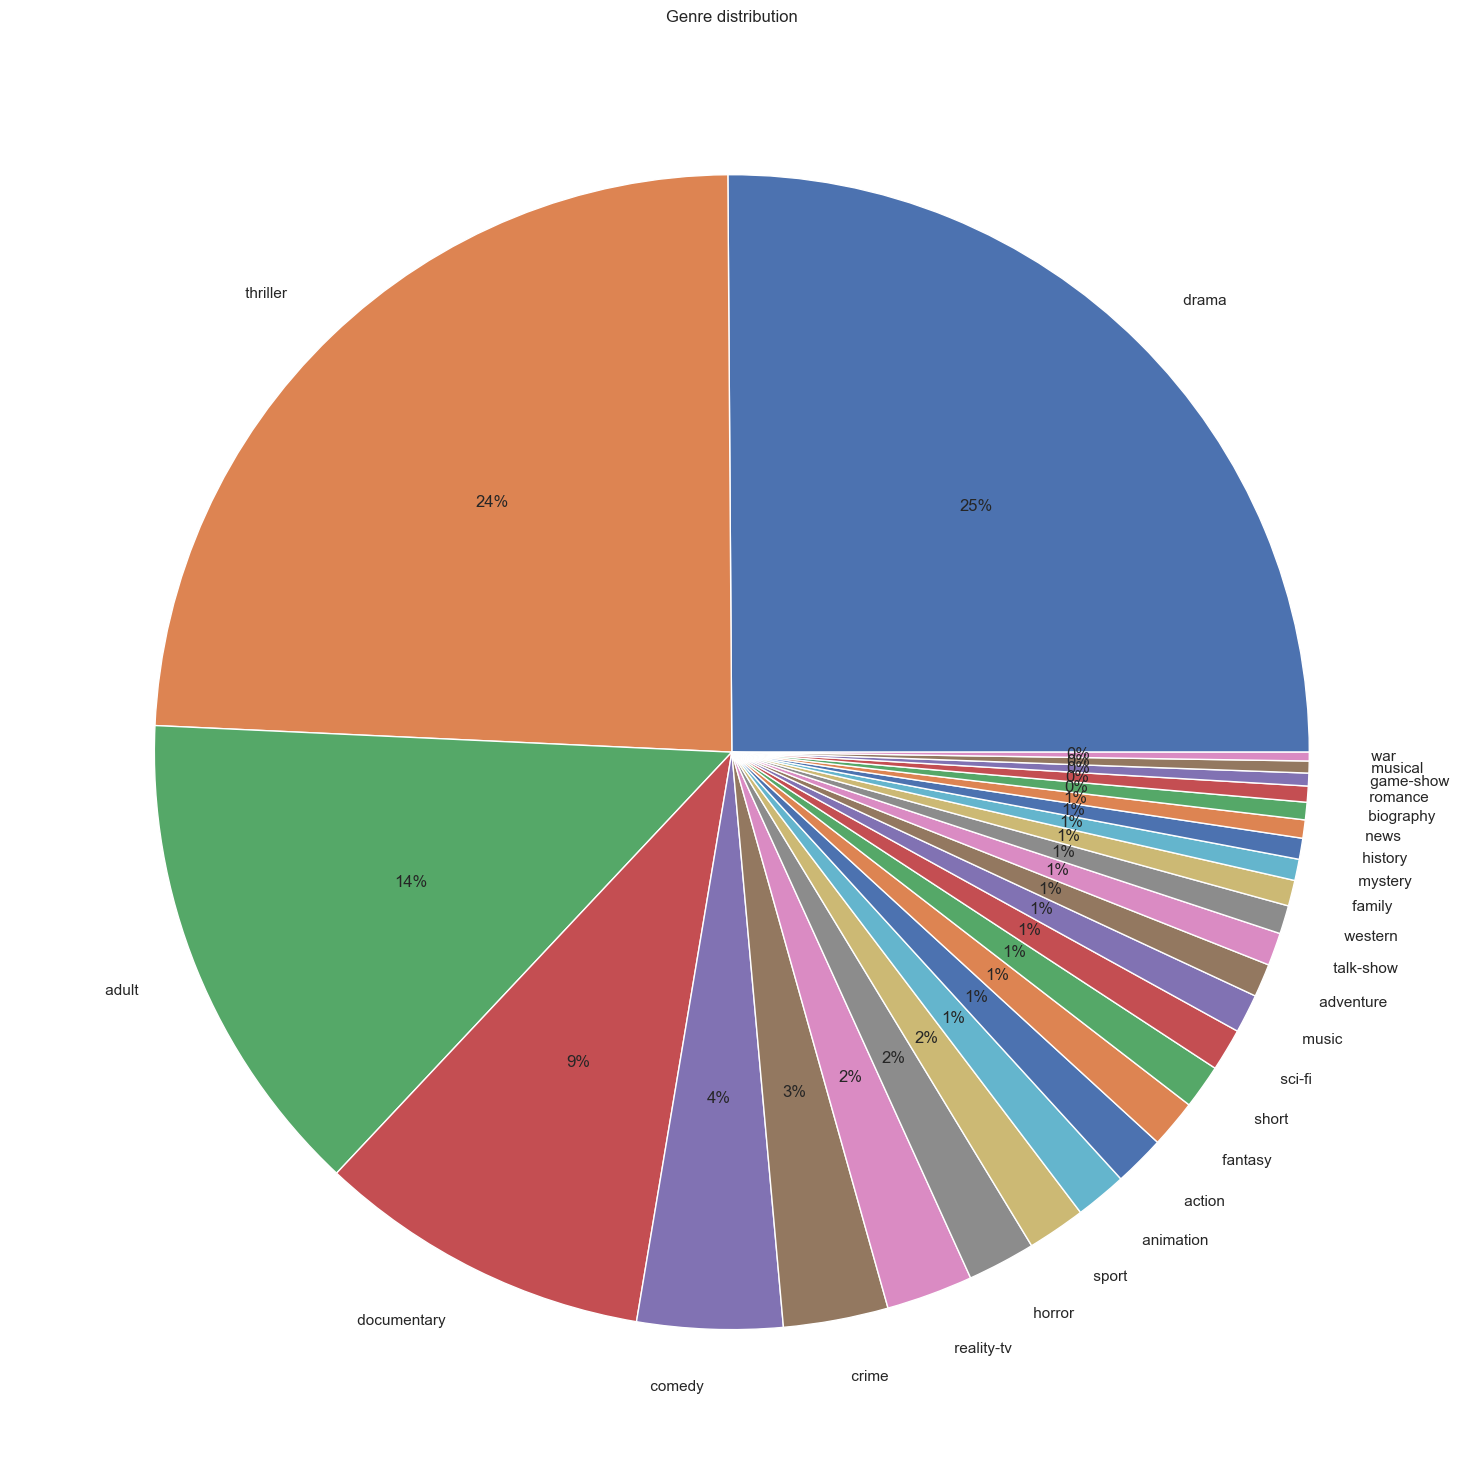

In [34]:
# Genre distribution

plt.figure(figsize = (15,15))

plt.pie(df_train['Genre'].value_counts().values, labels = [' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ', ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ', ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ', ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.0f%%')

plt.title("Genre distribution")
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

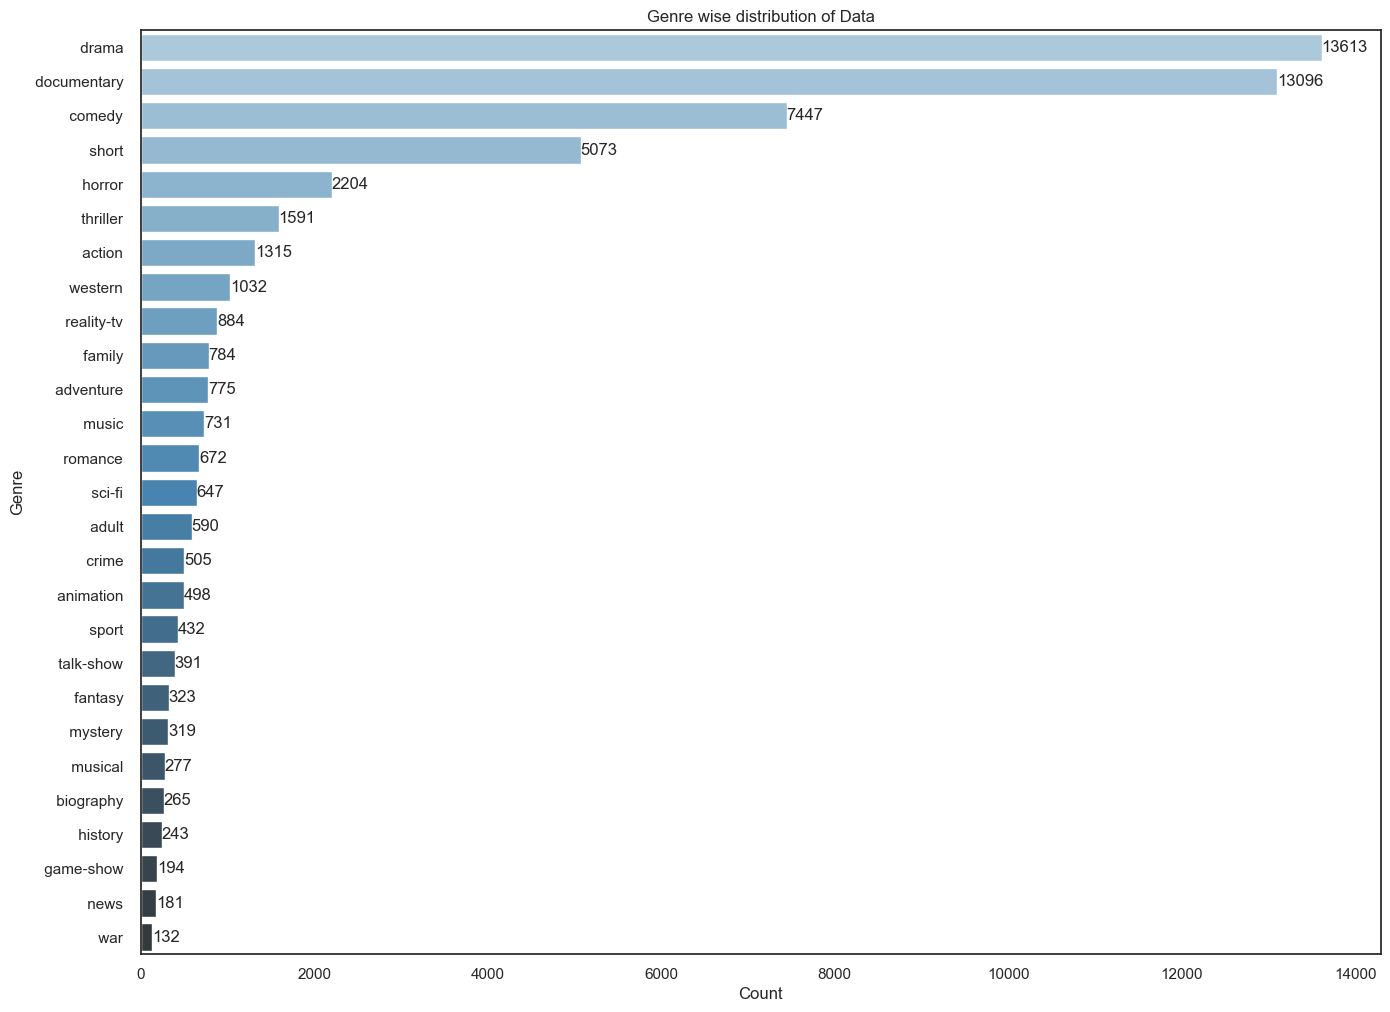

In [31]:
#Genre wise distribution

sns.set(style="white")
genre_to_count=pd.DataFrame({'Genre':df_train['Genre'].value_counts().index, 'Count':df_train['Genre'].value_counts().values})

plt.figure(figsize=(16,12))

plt.title('Genre wise distribution of Data')

ax = sns.barplot(y="Genre", x="Count", data=genre_to_count, palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i, )

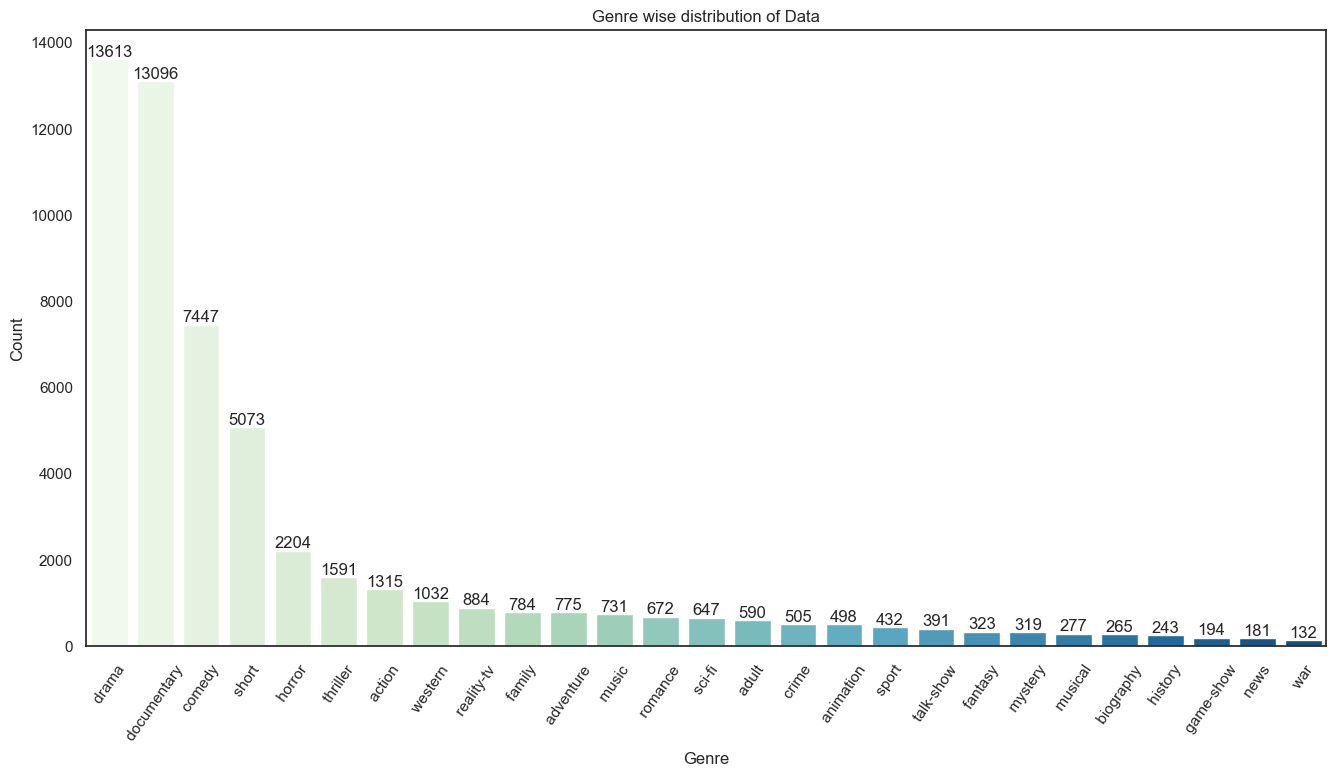

In [32]:
#Genre wise distribution
Genre = df_train['Genre'].value_counts().to_frame().reset_index()

Genre.columns = ['Genre','Count']

plt.figure(figsize = (16,8))

plt.title('Genre wise distribution of Data')
plt.xticks(rotation = 55)

ax=sns.barplot(x = Genre['Genre'],y = Genre['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i, )

## Initialize Text Vectorization(TF-IDF) vectorizer

In [36]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(df_train['Description'])

# Transform the test data
y_train = df_train['Genre']

## Split Data and Train Model

In [37]:
x = x_train_tfidf
y = df_train['Genre']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
print("size of x: ", x.shape)
print("\nsize of y: ", y.shape)

size of x:  (54214, 5000)

size of y:  (54214,)


In [39]:
print("\nsize of x_train: ", x_train.shape)
print("\nsize of x_test: ",x_test.shape)
print("\nsize of y_train: ",y_train.shape)
print("\nsize of y_test: ",y_test.shape)


size of x_train:  (43371, 5000)

size of x_test:  (10843, 5000)

size of y_train:  (43371,)

size of y_test:  (10843,)


## Models

In [40]:
model_1 = MultinomialNB()
model_1.fit(x_train, y_train)

MultinomialNB()

In [41]:
model_2 = BernoulliNB()
model_2.fit(x_train, y_train)

BernoulliNB()

In [43]:
model_3 = MLPClassifier()
model_3.fit(x_train, y_train)

MLPClassifier()

In [44]:
model_4 = LogisticRegression()
model_4.fit(x_train, y_train)

LogisticRegression()

In [45]:
model_5 = RandomForestClassifier()
model_5.fit(x_train, y_train)

RandomForestClassifier()

In [133]:
if len(x_test_predictions) == len(df_test.index):
    df_test['Predicted_Genre_NB'] = x_test_predictions
else:
    print("Length of prediction array does not match DataFrame index.")
    print(f"Prediction array length: {len(x_test_predictions)}")
    print(f"DataFrame index length: {len(df_test.index)}")

Length of prediction array does not match DataFrame index.
Prediction array length: 10843
DataFrame index length: 54200


In [ ]:
def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

def train_model():
    df_train = pd.read_csv('C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt', sep=':::', header=None, names=['Id', 'Title', 'Genre', 'Description'], engine='python')
    df_test = pd.read_csv("C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data.txt", sep=':::', names=['Id', 'Title', 'Description'], engine='python'

    combined_data = pd.concat([df_train, df_test], ignore_index=True)
    data = combined_data
    data = data.dropna()
    corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
    word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)


    def get_sentence_embedding(sentence):
        words = re.findall(r'\w+', sentence.lower())
        vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        return sum(vectors) / len(vectors) if vectors else [0] * 100

    data["embeddings"] = data["Description"].apply(get_sentence_embedding)
    x = pd.DataFrame(data["embeddings"].to_list())
    label_encoder = LabelEncoder()
    data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
    y = data["genre_encoded"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)

    return model, label_encoder

def predict_genre(model, label_encoder, new_descriptions):
    new_embeddings = [get_sentence_embedding(desc) for desc in new_descriptions]
    new_X = pd.DataFrame(new_embeddings)
    new_predictions = model.predict(new_X)
    predicted_genres = label_encoder.inverse_transform(new_predictions)

    return predicted_genres

trained_model, genre_label_encoder = train_model()

new_descriptions = ["A group of friends embark on an adventurous journey.","In a dystopian future, a hero rises to save the world.","A heartwarming story of family and friendship."]


predicted_genres = predict_genre(trained_model, genre_label_encoder, new_descriptions)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()

In [46]:
model_1 = MultinomialNB()
model_2 = BernoulliNB()
model_3 = MLPClassifier()
model_4 = LogisticRegression()
model_5 = RandomForestClassifier()

In [47]:
columns = ['Multinomial NB', 'Bernoulli NB', 'MLP Classifier', 'Logistic Regression', 'Random Forest Classifier']
accuracies=[]

In [48]:
def call(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)
    
    print("________MODEL EVALUATION ON TEST DATA________")
    print("Model: ")
    print(model)
    
    print("\nAccuracy of the Model: ")
    print(accuracy)

    print("\nClassification Report: ")
    print(classification_report(y_test, y_pred))

In [49]:
call(model_1)

________MODEL EVALUATION ON TEST DATA________
Model: 
MultinomialNB()

Accuracy of the Model: 
0.5120354145531679

Classification Report: 
               precision    recall  f1-score   support

      action        0.57      0.05      0.09       263
       adult        1.00      0.02      0.04       112
   adventure        0.44      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.40      0.45      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.89      0.69      2659
       drama        0.45      0.84      0.58      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.03      0.05        40
     history        0.00      0.00      0.00        45
      horror        0.77      0.27      0.40       431
       music        0.92      0.08 

In [50]:
call(model_2)

________MODEL EVALUATION ON TEST DATA________
Model: 
BernoulliNB()

Accuracy of the Model: 
0.5007839158904362

Classification Report: 
               precision    recall  f1-score   support

      action        0.34      0.42      0.37       263
       adult        0.54      0.46      0.49       112
   adventure        0.23      0.19      0.21       139
   animation        0.37      0.14      0.21       104
   biography        0.01      0.02      0.02        61
      comedy        0.50      0.53      0.51      1443
       crime        0.17      0.10      0.13       107
 documentary        0.75      0.65      0.70      2659
       drama        0.65      0.48      0.55      2697
      family        0.24      0.11      0.15       150
     fantasy        0.22      0.09      0.13        74
   game-show        0.52      0.30      0.38        40
     history        0.06      0.04      0.05        45
      horror        0.60      0.62      0.61       431
       music        0.33      0.73   

In [51]:
call(model_3)

________MODEL EVALUATION ON TEST DATA________
Model: 
MLPClassifier()

Accuracy of the Model: 
0.5160011067047865

Classification Report: 
               precision    recall  f1-score   support

      action        0.33      0.34      0.34       263
       adult        0.49      0.38      0.43       112
   adventure        0.18      0.23      0.20       139
   animation        0.29      0.21      0.24       104
   biography        0.06      0.02      0.03        61
      comedy        0.49      0.50      0.50      1443
       crime        0.19      0.13      0.15       107
 documentary        0.70      0.72      0.71      2659
       drama        0.55      0.61      0.57      2697
      family        0.17      0.17      0.17       150
     fantasy        0.07      0.04      0.05        74
   game-show        0.71      0.55      0.62        40
     history        0.00      0.00      0.00        45
      horror        0.54      0.55      0.54       431
       music        0.50      0.53 

In [52]:
call(model_4)

________MODEL EVALUATION ON TEST DATA________
Model: 
LogisticRegression()

Accuracy of the Model: 
0.5905192289956654

Classification Report: 
               precision    recall  f1-score   support

      action        0.53      0.27      0.36       263
       adult        0.81      0.22      0.35       112
   adventure        0.39      0.14      0.20       139
   animation        0.58      0.07      0.12       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.12      0.01      0.02       107
 documentary        0.67      0.87      0.75      2659
       drama        0.56      0.78      0.65      2697
      family        0.36      0.09      0.14       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.47      0.64        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.57      0.61       431
       music        0.63      

In [53]:
call(model_5)

________MODEL EVALUATION ON TEST DATA________
Model: 
RandomForestClassifier()

Accuracy of the Model: 
0.4786498201604722

Classification Report: 
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.88      0.06      0.12       112
   adventure        0.67      0.04      0.08       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.26      0.34      1443
       crime        1.00      0.01      0.02       107
 documentary        0.54      0.89      0.67      2659
       drama        0.41      0.83      0.55      2697
      family        0.80      0.03      0.05       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.89      0.20      0.33        40
     history        0.00      0.00      0.00        45
      horror        0.71      0.05      0.10       431
       music        0.68  

In [54]:
print("Accuracy of the Models: ", accuracies)

Accuracy of the Models:  [0.5120354145531679, 0.5007839158904362, 0.5160011067047865, 0.5905192289956654, 0.4786498201604722]


In [55]:
FinalResult = pd.DataFrame({'Models':columns, 'Accuracy':accuracies})
FinalResult

,Models,Accuracy
0,Multinomial NB,0.512035
1,Bernoulli NB,0.500784
2,MLP Classifier,0.516001
3,Logistic Regression,0.590519
4,Random Forest Classifier,0.478650


Text(0.5, 1.0, 'Model vs Accuracy_score')

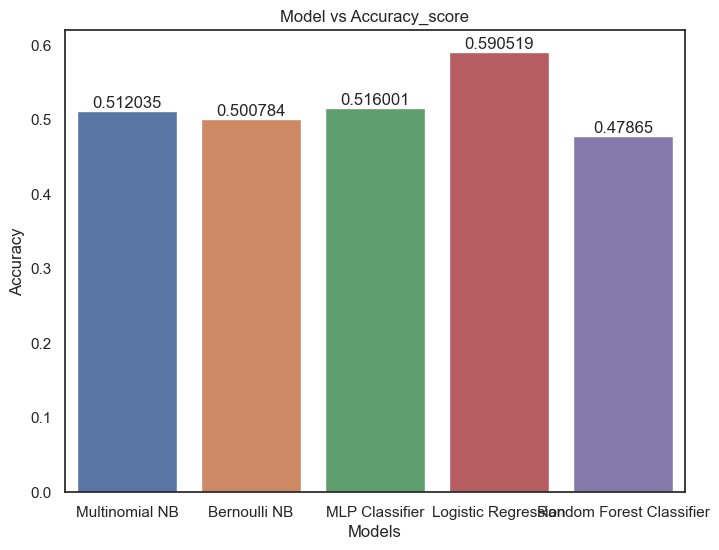

In [56]:
#Barplot of accuracies

plt.figure(figsize = (8, 6))

ax = sns.barplot(x = "Models", y = "Accuracy", data = FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')

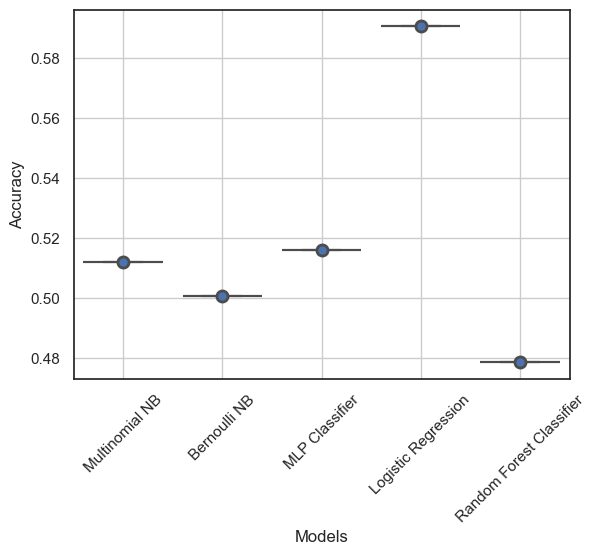

In [57]:
sns.boxplot(x='Models', y='Accuracy', data=FinalResult)

sns.stripplot(x='Models', y='Accuracy', data=FinalResult, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation = 45)
plt.grid()

## Accuracy of the models on Train Dataset

In [58]:
y_train_pred1 = model_1.predict(x_train)
print(y_train_pred1)

y_train_accuracy1 = accuracy_score(y_train, y_train_pred1)
print("Accuracy: {:.2f}%".format(y_train_accuracy1 * 100))

[' short ' ' drama ' ' documentary ' ... ' drama ' ' comedy '
 ' documentary ']
Accuracy: 53.16%


In [59]:
y_train_pred2 = model_2.predict(x_train)
print(y_train_pred2)

y_train_accuracy2 = accuracy_score(y_train, y_train_pred2)
print("Accuracy: {:.2f}%".format(y_train_accuracy2 * 100))

[' short ' ' drama ' ' documentary ' ... ' drama ' ' comedy '
 ' documentary ']
Accuracy: 57.72%


In [60]:
y_train_pred3 = model_3.predict(x_train)
print(y_train_pred3)

y_train_accuracy3 = accuracy_score(y_train, y_train_pred3)
print("Accuracy: {:.2f}%".format(y_train_accuracy3 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 99.95%


In [61]:
y_train_pred4 = model_4.predict(x_train)
print(y_train_pred4)

y_train_accuracy4 = accuracy_score(y_train, y_train_pred4)
print("Accuracy: {:.2f}%".format(y_train_accuracy4 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 66.59%


In [62]:
y_train_pred5 = model_5.predict(x_train)
print(y_train_pred5)

y_train_accuracy5 = accuracy_score(y_train, y_train_pred5)
print("Accuracy: {:.2f}%".format(y_train_accuracy5 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 99.96%


## Accuracy of the models on Test Dataset

In [63]:
y_test_pred1 = model_1.predict(x_test)
print(y_test_pred1)

y_test_accuracy1 = accuracy_score(y_test, y_test_pred1)
print("Accuracy: {:.2f}%".format(y_test_accuracy1 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama ' ' horror ']
Accuracy: 51.20%


In [64]:
y_test_pred2 = model_2.predict(x_test)
print(y_test_pred2)

y_test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Accuracy: {:.2f}%".format(y_test_accuracy2 * 100))

[' drama ' ' drama ' ' short ' ... ' romance ' ' short ' ' horror ']
Accuracy: 50.08%


In [65]:
y_test_pred3 = model_3.predict(x_test)
print(y_test_pred3)

y_test_accuracy3 = accuracy_score(y_test, y_test_pred3)
print("Accuracy: {:.2f}%".format(y_test_accuracy3 * 100))

[' comedy ' ' drama ' ' horror ' ... ' thriller ' ' short ' ' horror ']
Accuracy: 51.60%


In [66]:
y_test_pred4 = model_4.predict(x_test)
print(y_test_pred4)

y_test_accuracy4 = accuracy_score(y_test, y_test_pred4)
print("Accuracy: {:.2f}%".format(y_test_accuracy4 * 100))

[' comedy ' ' drama ' ' horror ' ... ' drama ' ' short ' ' horror ']
Accuracy: 59.05%


In [67]:
y_test_pred5 = model_5.predict(x_test)
print(y_test_pred5)

y_test_accuracy5 = accuracy_score(y_test, y_test_pred5)
print("Accuracy: {:.2f}%".format(y_test_accuracy5 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 47.86%


# Comparison

## On the Basis of Accuracy of the Models 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Multinomial NB'),
  Text(1, 0, 'Bernoulli NB'),
  Text(2, 0, 'MLP Classifier'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest Classifier')])

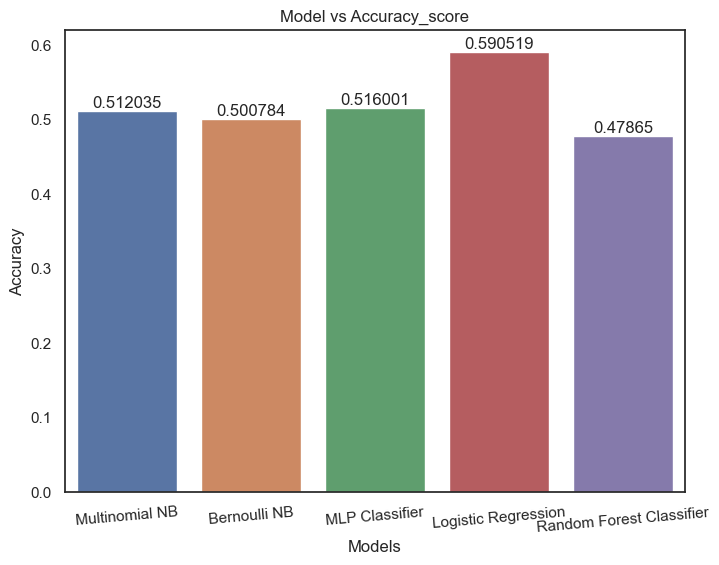

In [68]:
#Barplot of accuracies

plt.figure(figsize = (8, 6))

ax = sns.barplot(x = "Models", y = "Accuracy", data = FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')

plt.xticks(rotation = 5)

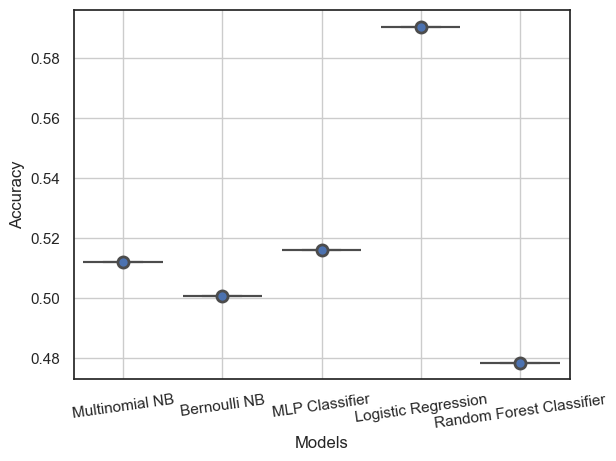

In [69]:
sns.boxplot(x='Models', y='Accuracy', data=FinalResult)

sns.stripplot(x='Models', y='Accuracy', data=FinalResult, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation = 8)
plt.grid()

In [70]:
sum = y_test_accuracy1 + y_test_accuracy2 + y_test_accuracy3 + y_test_accuracy4 + y_test_accuracy5

size1 = (y_test_accuracy1/sum)
size2 = (y_test_accuracy2/sum)
size3 = (y_test_accuracy3/sum)
size4 = (y_test_accuracy4/sum)
size5 = (y_test_accuracy5/sum)

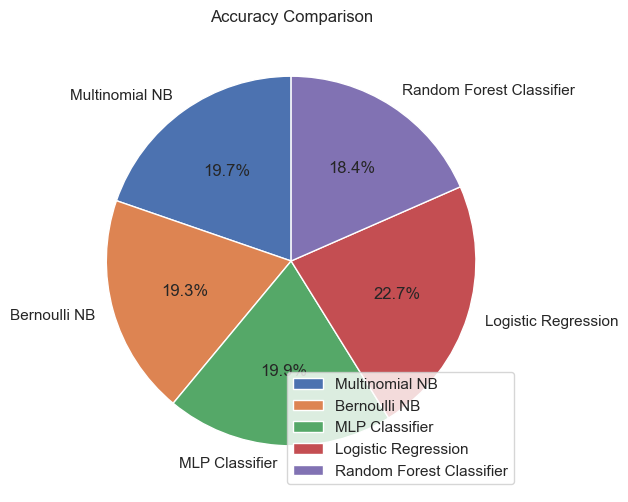

In [71]:
labels = ['Multinomial NB', 'Bernoulli NB', 'MLP Classifier', 'Logistic Regression', 'Random Forest Classifier']
sizes = [size1, size2, size3, size4, size5]

# Plotting the pie chart
plt.figure(figsize=(8,6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Accuracy Comparison')

plt.legend()
plt.show()

In [51]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
x_test_tfidf = tfidf_vectorizer.fit_transform(df_test['Description'])

In [59]:
x_test_predictions = model_4.predict(x_test_tfidf)

df_test['Predicted_Genre'] = x_test_predictions

In [61]:
df_test.to_csv('predicted_genres.csv', index=False)

print(df_test)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...          drama   
2       One year in the life of Albin and his family ...          drama   
3       His father has died, he hasn't spoken with hi...    documentary   
4       Before he was kn

In [70]:
# Predict genres for new descriptions
new_descriptions = [
    " L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.",
    " Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of 'prince' of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers, his resigned mother and a retrograde father of authoritarian ideas. But many years have passed, and the civil war that won the despot Don Pablo is simply for their children 'Dad's war'.",
    " One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products.",
    " His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are against him and when stakes are the highest, Diego gets a visit from a very uncommon man.",
    " Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama written and directed by renowned filmmaker Chin Chien (My Intimate Partners). Featuring the 14-year-old Bruce Lee and future Cantonese Opera star Yuen Siu Fai, the B&W film revolves around accountant Ming (played by Cheung Wood Yau) and his wife (Tsi Lo Lin) who suffers a miscarriage in an car accident. The couple decides to adopt a baby girl, not knowing that she's the daughter given up by Ming's poor co-worker who struggles to feed a bunch of kids. Bruce Lee plays the slacker son of the landlord (Ko Lo Chuen)."
]

# Vectorize new descriptions
new_descriptions_tfidf = tfidf_vectorizer.transform(new_descriptions)

# Predict genres
predicted_genres = model_5.predict(new_descriptions_tfidf)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()


Description:  L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.
Predicted Genre:  drama 

Description:  Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of 'prince' of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest